In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
# Import CSV
data = pd.read_csv('Car_safety.csv')

In [3]:
car_data = pd.DataFrame(data)

In [17]:
# Data contain non-numerical values need to convert 
car_data.head(10)

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,Class_Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [5]:
list(car_data.columns.values)

['Buying',
 'Maintenance',
 ' Doors',
 ' Persons',
 ' Lug_Boot',
 ' Safety',
 ' Class_Values']

In [9]:
# creating our x
# need to convert data as array within a array, multiple dimensional array
X = car_data[['Buying',
 'Maintenance',
 ' Doors',
 ' Persons',
 ' Lug_Boot',
 ' Safety']]


In [10]:
# get_dummies turn to binary form for every non-numerical value
data_copy = X.copy()

data_binary_encoded = pd.get_dummies(data_copy)
#data_binary_encoded.head()
list(data_binary_encoded.columns.values)

['Buying_high',
 'Buying_low',
 'Buying_med',
 'Buying_vhigh',
 'Maintenance_high',
 'Maintenance_low',
 'Maintenance_med',
 'Maintenance_vhigh',
 ' Doors_2',
 ' Doors_3',
 ' Doors_4',
 ' Doors_5more',
 ' Persons_2',
 ' Persons_4',
 ' Persons_more',
 ' Lug_Boot_big',
 ' Lug_Boot_med',
 ' Lug_Boot_small',
 ' Safety_high',
 ' Safety_low',
 ' Safety_med']

In [7]:
#y_code = data_binary_encoded[[' Class_Values_acc', ' Class_Values_good', ' Class_Values_unacc', ' Class_Values_vgood']]

y = pd.DataFrame(y_code)

In [8]:
y


,Class_Values_acc,Class_Values_good,Class_Values_unacc,Class_Values_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1723,0,1,0,0
1724,0,0,0,1
1725,0,0,1,0
1726,0,1,0,0


In [11]:
# import sklearn.model selection
#shuffle data
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh,Doors_2,Doors_3,...,Doors_5more,Persons_2,Persons_4,Persons_more,Lug_Boot_big,Lug_Boot_med,Lug_Boot_small,Safety_high,Safety_low,Safety_med
1036,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
757,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
589,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
907,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1159,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [12]:
# scale data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

y_scaler = StandardScaler().fit(y_train)

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
X_train_scaled


array([[-0.56309251, -0.58329024,  1.70399955, ..., -0.70220194,
        -0.71695097,  1.42409177],
       [ 1.77590714, -0.58329024, -0.58685462, ..., -0.70220194,
        -0.71695097,  1.42409177],
       [ 1.77590714, -0.58329024, -0.58685462, ..., -0.70220194,
        -0.71695097,  1.42409177],
       ...,
       [ 1.77590714, -0.58329024, -0.58685462, ...,  1.42409177,
        -0.71695097, -0.70220194],
       [-0.56309251,  1.71441236, -0.58685462, ..., -0.70220194,
        -0.71695097,  1.42409177],
       [-0.56309251, -0.58329024,  1.70399955, ..., -0.70220194,
        -0.71695097,  1.42409177]])

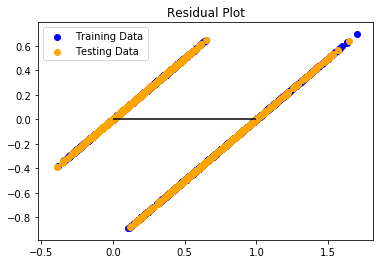

In [18]:
#step 4: Fit data to model and predict. Also plotting residuals 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [36]:
# step 5: Quantify the results
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.7583466231874358, R2: 0.2904461864724064


In [21]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_test_scaled, y_test_scaled)

ValueError: bad input shape (432, 4)